MINI_PROJECT_1

PART 1

QUESTION 1.1

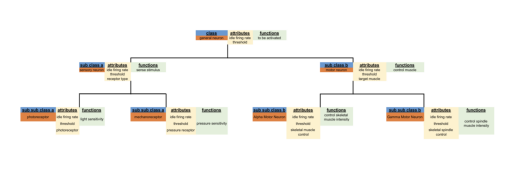

In [1]:
import matplotlib.pyplot as plt
hirarchy_tree = plt.imread('hirarcy tree.png')
plt.imshow(hirarchy_tree)
plt.axis('off')
plt.show()

QUESTION 1.2

In [2]:

#Defining a main class name "Neuron", costumizing it to have an idle_firing_rate and a throshold for activation
class Neuron:
    def __init__(self, idle_firing_rate=1, threshold=2):
        self.idle_firing_rate = idle_firing_rate
        self.threshold = threshold
        self.actual_firing_rate = 1
# a function to determine weather the neuron is activated or not
    def activate(self, stimulus_value=0):
        self.actual_firing_rate = stimulus_value * self.idle_firing_rate
        if self.actual_firing_rate < self.threshold:
            print("neuron didnt fire, threshold wasnt met")
        else:
            print("neuron fired with rate of", self.actual_firing_rate)

#creating a sub class (type a) that is a sensory neuron class
class Sensory(Neuron):
    def __init__(self, idle_firing_rate, threshold, receptor_type):
       super().__init__(idle_firing_rate, threshold)
       self.receptor_type = receptor_type
# a function to determine weather the neuron fired or not based on stimulus match, and detaling what stimuli and power was that
# if neuron didnt fire, mention why
    def Sense_Stimulus(self, stimulus, stimulus_value=1):
        if stimulus == self.receptor_type:
            print("the", self.receptor_type, "receptor received",
                   stimulus,  "with a strength value of", stimulus_value)
            super().activate(stimulus_value)
        else:
            print("Stimuli Doesnt match Receptor")

#sub-sub class (type a) No1, that is a photoreceptor (even though its not a neuron but a receptor cell it will inherite a neuron sub class)
class Photoreceptor(Sensory):
    def __init__(self, idle_fire_rating, threshold, receptor_type="light"):
        super().__init__(idle_fire_rating, threshold, receptor_type)
# only recieves light and can tell what power that light have - none/moderate/strong.
    def light_detector(self, stimulus="light", stimulus_value=1):
        if 0 < stimulus_value < 10:
            print("light level moderate")
        elif stimulus_value > 10:
            print("light level strong")
        else:
            print("no light, neuron didnt fire")

#sub-sub class (type a) No2, a mechanoreceptor
class Mechanoreceptor(Sensory):
    def __init__(self, idle_fire_rating, threshold, receptor_type="pressure"):
        super().__init__(idle_fire_rating, threshold, receptor_type)
#same as the photoreceptor but with pressure, it will tell the amount of power it detects
    def pressure_detection(self, stimulus="pressure", stimulus_value=1):
        if 0 < stimulus_value < 10:
            print("pressure level moderate")
        elif stimulus_value > 10:
            print("pressure level strong")
        else:
            print("no pressure, neuron didnt fire")

#sub class (type b), a motor neuron that can give signals for muscles to contract
class Motor(Neuron):
    def __init__(self, idle_firing_rate, threshold, target_muscle):
       super().__init__(idle_firing_rate, threshold)
       self.target_muscle = target_muscle
# given a stimuli value it will tell if the threshold is met and weather the neuron been activated or not
    def Muscle_control(self, stimulus_value):
        super().activate(stimulus_value)
        if self.actual_firing_rate > self.threshold:
            print("muscle is contracted")
        else:
            print("muscle not conrtacted")

#sub class (type b) No1, a sub class of motor neuron ingaging only a specific type of muscle
class Alpha(Motor):
    def __init__(self, idle_firing_rate, threshold, target_muscle="skeletal muscle"):
        super().__init__(self, idle_firing_rate, threshold, target_muscle="skeletal muscle")
# given a stimulus value it will tell if and in what way was the specific muslce activated
    def Muscle_control(self, stimulus_value):
        super().activate(stimulus_value)
        if self.actual_firing_rate > self.threshold:
            print("skeletal muscle is rapidly and strongly contracted")
        else:
            print("skeletal muscle is not conrtacted")


#sub class (type b) No2, a sub class of motor neuron ingaging only a specific type of muscle 
class Gamma(Motor):
    def __init__(self, idle_firing_rate, threshold, target_muscle="muscle spindle"):
        super().__init__(self, idle_firing_rate, threshold, target_muscle="muscle spindle")
# given a stimulus value it will tell if and in what way was the specific muslce activated
    def Muscle_control(self, stimulus_value):
        super().activate(stimulus_value)
        if self.actual_firing_rate > self.threshold:
            print("muscle spindle is slowly and gradualy contracted")
        else:
            print("muscle spindle is not conrtacted")


PART 2

QUESTION 2.1

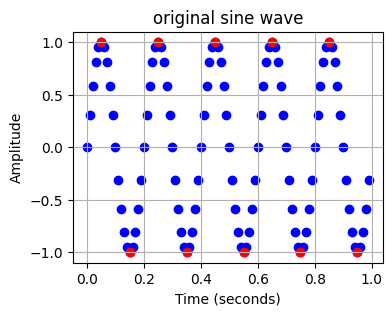

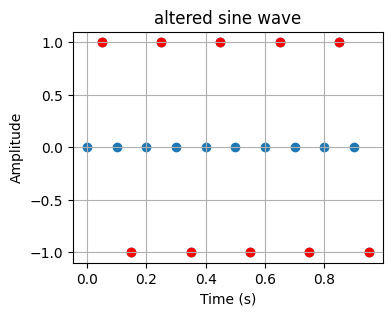

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#create sinus with 5 herz and sampling of 0.01 s
#making a range of 1 sec for the sake of limiting the plot and include all of the 0.01 sampling 
t = np.arange(0, 1, 0.01)
#setting parameters for the sinus
frequency = 5        # Frequency in Hertz
sampling_rate = 0.01   # Samples per second
duration = 1          # Duration in seconds of all the sinus graph

#generate the sinus wave based on time array created before and parameters
y = np.sin(2 * np.pi * 5 * t)

#find min and max points
extrema_indices = np.where(np.diff(np.sign(np.diff(y))) != 0)[0] + 1
extrema_x = t[extrema_indices]
extrema_y = y[extrema_indices]

#Creating plot
plt.figure(figsize=(4, 3))
plt.scatter(t, y, color='blue')  # Continuous line plot
plt.scatter(extrema_x, extrema_y, color='red')  # Red points on extrema
#Labeling the plot
plt.title("original sine wave")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)

#a function to reduce sampling size by any amount i want
def sine_sampling(frequency, sampling_rate, percent_downsize):
    #transforming the percent number into a number you can multiply the sampling rate and get the effect you want
    percent_downsize = 100 / percent_downsize
    #made the sampling rate change by the percentage i want it downsized
    t = np.arange(0, 1, sampling_rate * percent_downsize)  
    sine_function = np.sin(2 * np.pi * frequency * t)  

    plt.figure(figsize=(4, 3))
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('altered sine wave')
    plt.grid(True)
    plt.scatter(t, sine_function, label="Sine Wave") 
    #making sure the extrema is always on the graph, this time 20% do get the extrema
    plt.scatter(extrema_x, extrema_y, color='red', label='Extrema')  
    plt.show()
              
sine_sampling(5, 0.01, 20)

PART 2 OF MINI_PROJECT_1

QUESTION 2.1

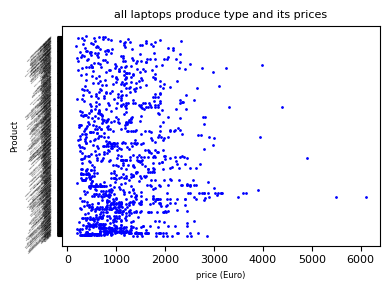

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading the cvs file and making it with pandas a dataframe
df = pd.read_csv('C:\\python advenced\\my-reposatory\\mini project 1\\laptop_price_dataset.csv')

#making a scatter plot, sizing down the plots because there are too many
plt.figure(figsize=(4, 3))  
plt.scatter(df['Price (Euro)'], df['Product'], color='blue', s=1)

#making titles with matplotlib
plt.xlabel('price (Euro)', fontsize=6)
plt.ylabel('Product', fontsize=6)
plt.title('all laptops produce type and its prices', fontsize=8)

#adjusting the axises marks to sort of fitting the graph, again, too many laptops at once
plt.yticks(rotation=45, fontsize=0.01)
plt.xticks(fontsize = 8)
#trying to space the laptops names
plt.tight_layout()  
plt.show()

QUESTION 2.2

{'Apple': 1564, 'HP': 1080, 'Acer': 633, 'Asus': 1124, 'Dell': 1199, 'Lenovo': 1094, 'Chuwi': 314, 'MSI': 1729, 'Microsoft': 1612, 'Toshiba': 1268, 'Huawei': 1424, 'Xiaomi': 1133, 'Vero': 217, 'Razer': 3346, 'Mediacom': 295, 'Samsung': 1413, 'Google': 1678, 'Fujitsu': 729, 'LG': 2099}


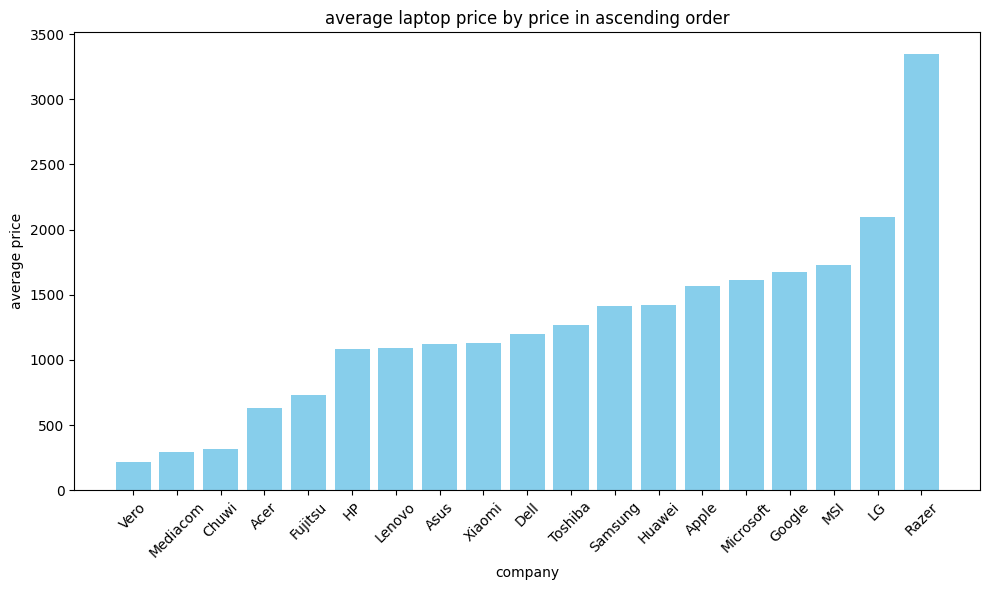

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\python advenced\\my-reposatory\\mini project 1\\laptop_price_dataset.csv')

#making a dict for saving each company and its laptop prices
companies_prices = {}

#searching dataframe in each row for the company name in it using pandas functions.
for index, row in df.iterrows():
    company_name = row['Company']
    price = row['Price (Euro)']
    #if company none exist in dict, make new key
    if company_name not in companies_prices:
        companies_prices[company_name] = []  
    #adding each price as value for its company (key) in dict
    companies_prices[company_name].append(price)  

#calculating mean value from the list of value for each key: meaning, receiving average price for each key (company) as value
for company in companies_prices:
    average_price = sum(companies_prices[company]) / len(companies_prices[company])
    #rounding to get a nice value, cent and penny is below interest
    companies_prices[company] = round(average_price)  

#printing the dictionary to answer average price for each company
print(companies_prices)

#sorting the prices to get a nice histogram
sorted_companies_prices = dict(sorted(companies_prices.items(), key=lambda item: item[1]))

#making the histogram
plt.figure(figsize=(10, 6))  # קביעת גודל הגרף
plt.bar(sorted_companies_prices.keys(), sorted_companies_prices.values(), color='skyblue')
plt.xlabel('company')
plt.ylabel('average price')
plt.title('average laptop price by price in ascending order')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

the company in which on average has the most expansive laptop is: "Razer" 

average laptop price for each company (in Euro): 'Apple': 1564, 'HP': 1080, 'Acer': 633, 'Asus': 1124, 'Dell': 1199, 'Lenovo': 1094, 'Chuwi': 314, 'MSI': 1729, 'Microsoft': 1612, 'Toshiba': 1268, 'Huawei': 1424, 'Xiaomi': 1133, 'Vero': 217, 'Razer': 3346, 'Mediacom': 295, 'Samsung': 1413, 'Google': 1678, 'Fujitsu': 729, 'LG': 2099

QUESTION 2.3

dict_keys(['macos', 'no os', 'windows 10', 'mac os x', 'linux', 'android', 'windows 10 s', 'chrome os', 'windows 7'])


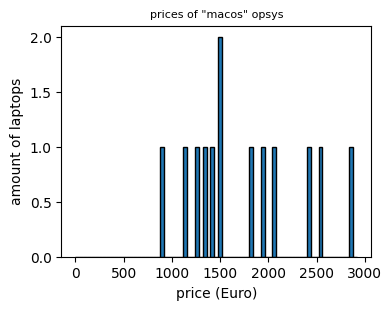

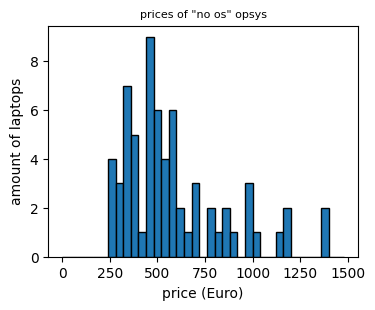

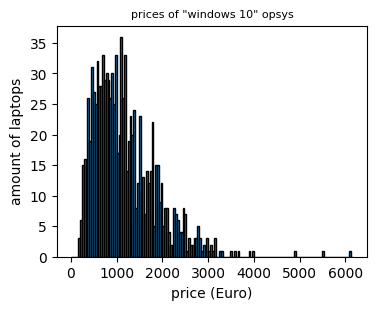

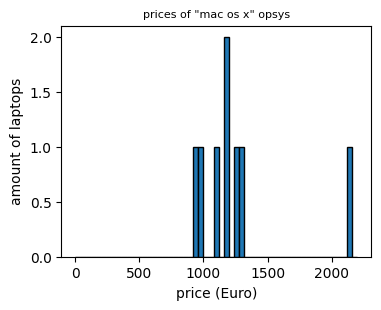

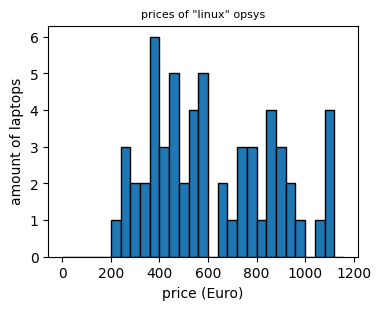

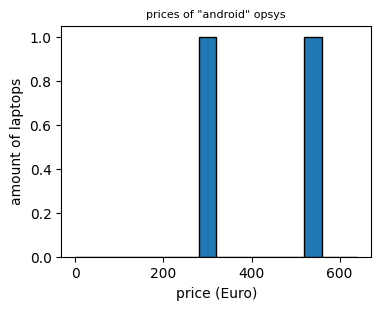

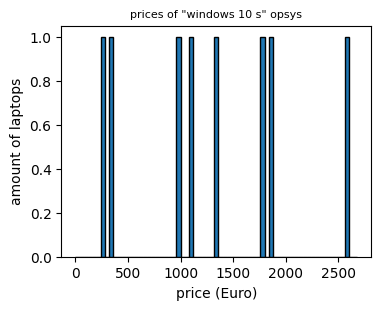

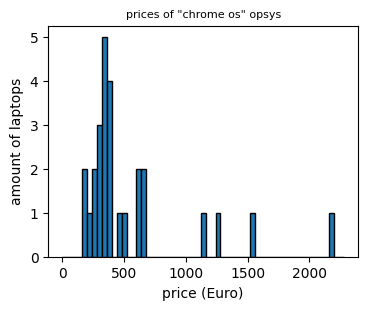

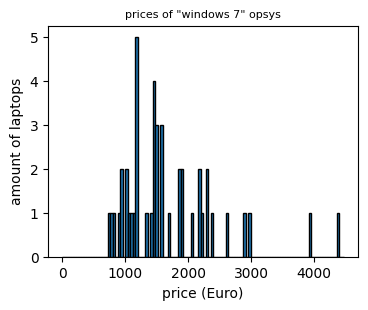

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\python advenced\\my-reposatory\\mini project 1\\laptop_price_dataset.csv')

#making sure all opsys are written the same way, assuimng no misspelling was made
df['OpSys'] = df['OpSys'].str.lower().str.strip()
#making a new dict with opsys as keys and prices as values using search with pandas function
opsys_prices = {}

for index, row in df.iterrows():
    opsys = row['OpSys']
    price = row['Price (Euro)']
    
    if opsys not in opsys_prices:
        opsys_prices[opsys] = []  

    opsys_prices[opsys].append(price) 

#cheking no double of the same opsys
print(opsys_prices.keys())

#a loop to create from my dict a histogram for each opsys and its prices
for opsys, price in opsys_prices.items():
    plt.figure(figsize=(4, 3)) 
    plt.hist(price, bins=np.arange(0, max(price) + 100, 40), edgecolor='black')
    plt.title(f'prices of "{opsys}" opsys', fontsize = 8)
    plt.xlabel('price (Euro)')
    plt.ylabel('amount of laptops')
    yticks = np.arange(0, np.ceil(max(y)) + 1, 1)
    plt.show()

QUESTION 2.4

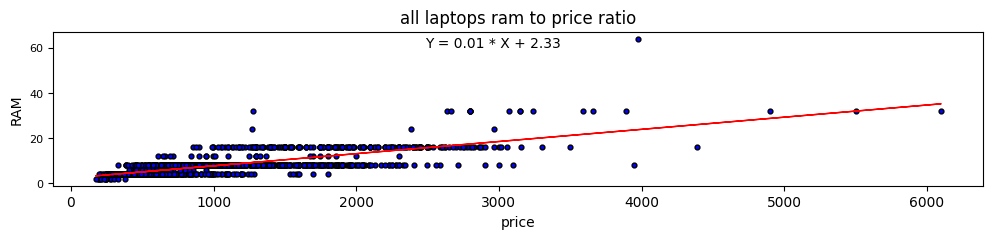

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\python advenced\\my-reposatory\\mini project 1\\laptop_price_dataset.csv')

#plotting a scatter
plt.figure(figsize=(12, 2)) 
plt.scatter(df['Price (Euro)'], df['RAM (GB)'], color='blue', edgecolors= 'black', s = 12)

#making a linear regression line
slope, intercept = np.polyfit(df['Price (Euro)'], df['RAM (GB)'], 1)
line = slope * df['Price (Euro)'] + intercept
plt.plot(df['Price (Euro)'], line, color='red', linewidth=1, label='trend line')

#finding the slope's equation
plt.text(x=0.4, y=0.9, s=f'Y = {slope:.2f} * X + {intercept:.2f}', transform=plt.gca().transAxes)

#titles and axises
plt.xlabel('price')
plt.ylabel('RAM')
plt.title('all laptops ram to price ratio')
plt.yticks(rotation=0, fontsize=8)
plt.show()

there isn't a stong relationship between RAM and price, meaning you have to pay a realy high price just to get a small elivation in your RAM size as i compare 1 Euro to 1 RAM(GB). But i ain't no expert, maby this relationship is the real deal and it is worthwhile so for good money you get alot of RAM(GB) compared to small money amounts.

QUESTION 2.5

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\python advenced\\my-reposatory\\mini project 1\\laptop_price_dataset.csv')

#Copy Memory row and replace all numbers, 'GB', 'TB', '.' with nothing.
#\b is checking the start or the end of a word
#\d+ is cheking all numbers
#(GB|TB|.) checking for these to remove them and also all numbers with or without '.' and replace with nuthing
#also get rid of all spaces
df["Storage type"] = df["Memory"].replace(r'\b\d+(GB|TB|.)','', regex=True).str.strip()

#cheking for things to fix after main sorting and replacing
print(df["Storage type"].unique())

#replace all lucky content that survived the first purge
df["Storage type"] = df["Storage type"].replace('HDD +   HDD', 'HDD')
df["Storage type"] = df["Storage type"].replace('SSD +   SSD', 'SSD')

#check before submit for nothing to repeat itself or other problems
print(df["Storage type"].unique())


print(df["Storage type"])





['SSD' 'Flash Storage' 'HDD' 'SSD +   HDD' 'SSD +   SSD' 'Hybrid'
 'Flash Storage +   HDD' 'HDD +   HDD' 'SSD +   Hybrid']
['SSD' 'Flash Storage' 'HDD' 'SSD +   HDD' 'Hybrid'
 'Flash Storage +   HDD' 'SSD +   Hybrid']
0                 SSD
1       Flash Storage
2                 SSD
3                 SSD
4                 SSD
            ...      
1270              SSD
1271              SSD
1272    Flash Storage
1273              HDD
1274              HDD
Name: Storage type, Length: 1275, dtype: object


BONUS QUESTIONS:
1. what is the one most shared feature for most or all laptops?
analyses and visualizations: checking for the most reapeted word in the dataframe. 

2. is havier means more expansive?
analyses and visualizations: plotting the row of price and row of weight.

3. which is the most succesful CPU company?
analyses and visualizations: checking which of the CPU companies name is the most repeated.

4. what is the most rewarding laptop? (personaly without understanding the field) - most advanced for the least money
analyses and visualizations: checking for the lowest price and weight and biggest screen, most advanced CPU and most RAM (GB).

BONUS QUESTION 1

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\python advenced\\my-reposatory\\mini project 1\\laptop_price_dataset.csv')

mydict = {}

#going through all the columns
for column in df.columns:
    #going through all the text in each column
    for text in df[column]:
        #splitting the text into words
        words = str(text).split()
        #for each word, check if its already in my dictionary, if not, add it with value of 1 count
        for word in words:
            if word not in mydict:
                mydict[word] = 1
            else:
                #if the word exist in dictionary, adding to its current value 1
                mydict[word] += 1

#find the word with the gihest count value
max_word = max(mydict, key=mydict.get)
max_count = mydict[max_word]

#lets see what is the most shared feature of all laptops
print(f"The most frequent word is '{max_word}' with {max_count} occurrences.")

The most frequent word is 'Intel' with 1918 occurrences.


FINDINGS EXPLAINED: MOST LAPTOPS HAVE AN 'intel' CPU. AND THAT IS THE MOST SHARED FEATURE BETWEEN LAPTOPS. 

BONUS QUESTION 2

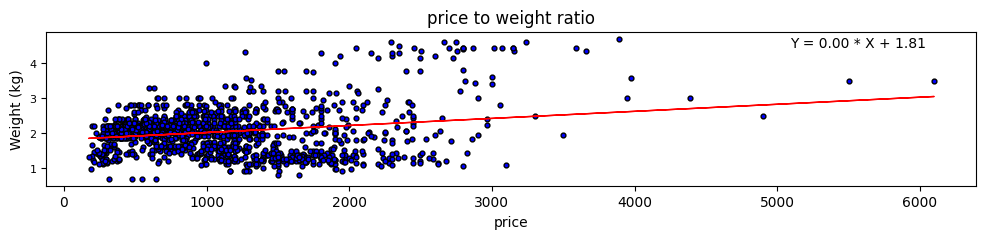

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\python advenced\\my-reposatory\\mini project 1\\laptop_price_dataset.csv')

#plotting a scatter
plt.figure(figsize=(12, 2)) 
plt.scatter(df['Price (Euro)'], df['Weight (kg)'], color='blue', edgecolors= 'black', s = 12)

#making a linear regression line
slope, intercept = np.polyfit(df['Price (Euro)'], df['Weight (kg)'], 1)
line = slope * df['Price (Euro)'] + intercept
plt.plot(df['Price (Euro)'], line, color='red', linewidth=1, label='trend line')

#finding the slope's equation
plt.text(x=0.8, y=0.9, s=f'Y = {slope:.2f} * X + {intercept:.2f}', transform=plt.gca().transAxes)

#titles and axises
plt.xlabel('price')
plt.ylabel('Weight (kg)')
plt.title('price to weight ratio')
plt.yticks(rotation=0, fontsize=8)
plt.show()

FINDINGS EXPLAINED: IT SEEMS THAT THE WEIGHT DOES NOT GIVE A CLUE WHETHER THE LAPTOP IS PRICY AT ALL.